In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [30]:
import mitosheet

In [31]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 15, n_output = 1 

In [32]:
m = n_input = 15
s = n_output = 1

In [33]:
np.random.seed(0)
x_min = np.random.randint(1,101, m+s)
x_min

array([45, 48, 65, 68, 68, 10, 84, 22, 37, 88, 71, 89, 89, 13, 59, 66])

In [34]:
np.random.seed(2)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([436.56,  26.9 , 550.11, 435.89, 420.95, 331.  , 205.44, 619.65, 300.36, 267.56, 621.51, 529.61, 135.45, 514.06, 185.26, 785.55])

In [35]:
x_max = x_min + delta_x
x_max

array([481.56,  74.9 , 615.11, 503.89, 488.95, 341.  , 289.44, 641.65, 337.36, 355.56, 692.51, 618.61, 224.45, 527.06, 244.26, 851.55])

In [36]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([263.28,  61.45, 340.06, 285.94, 278.47, 175.5 , 186.72, 331.83, 187.18, 221.78, 381.76, 353.81, 156.72, 270.03, 151.63, 458.77])

In [37]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 72.76,   4.48,  91.69,  72.65,  70.16,  55.17,  34.24, 103.28,  50.06,  44.59, 103.59,  88.27,  22.57,  85.68,  30.88, 130.92])

In [38]:
np.random.seed(1)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [39]:
std_list

[30.34244511132203,
 3.229491500320609,
 0.010486508796758554,
 21.963809886379792,
 10.296085950955375,
 5.094081519382365,
 6.377673357930631,
 35.687881728410055,
 19.86185037691193,
 24.02767444117187,
 43.42245233769633,
 60.483520416387506,
 4.615351611942221,
 75.23483979425232,
 0.8456167065009969,
 87.78093783686644]

In [40]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [41]:
cov_matrix_int[:3]

[(0, 1, -97.9906685859591, 97.9906685859591),
 (0, 2, -0.318186317575042, 0.318186317575042),
 (0, 3, -666.4356959129909, 666.4356959129909)]

In [42]:
len(cov_matrix_int)

120

In [43]:
cov_list = []
np.random.seed(1)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list[:5]

[-16.26213847423469,
 0.14020847847989354,
 -666.2832489910066,
 -123.5059384572358,
 -109.1996859533871]

In [44]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

16


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [45]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[  920.66   -16.26     0.14  -666.28  -123.51  -109.2   -157.78  -679.47  -186.15  -150.53   102.29  -296.59    51.88 -1349.36    19.4  -2517.6 ]
 [  -16.26    10.43     0.01   -11.73     3.9    -11.83   -12.44    69.32    60.07   -28.96    53.94   147.04    11.76  -201.64    -2.52  -187.2 ]
 [    0.14     0.01     0.       0.17    -0.09    -0.01     0.06     0.02     0.08    -0.09     0.17     0.42    -0.05     0.39     0.01     0.46]
 [ -666.28   -11.73     0.17   482.41   -99.3     64.73  -111.16   -81.69   356.49  -217.84  -404.81  -982.98   -97.44   591.03   -10.71  -904.05]
 [ -123.51     3.9     -0.09   -99.3    106.01    -0.88   -58.66    54.47  -144.49    44.19   178.62  -495.29    -8.17   301.17    -1.49  -813.5 ]
 [ -109.2    -11.83    -0.01    64.73    -0.88    25.95     2.33    59.55     3.01   108.84    38.29   248.58   -17.05  -276.5      2.65   -91.51]
 [ -157.78   -12.44     0.06  -111.16   -58.66     2.33    40.67  -152.33   108.31   -46.66   138.92   174.35    22.57

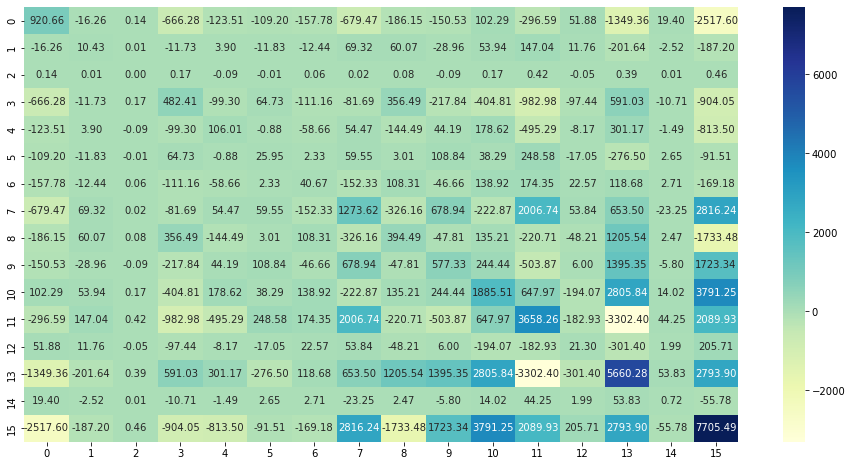

In [46]:
plt.figure(figsize = (16,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [47]:
mask = np.triu(np.ones_like(cov_matrix, dtype=bool))
# mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, Fal

In [48]:
pd.DataFrame(cov_matrix).mask(~mask).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,920.663975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-16.262138,10.429615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.140208,0.011546,0.000110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-666.283249,-11.731461,0.174190,482.408945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-123.505938,3.903005,-0.086733,-99.301351,106.009386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,-296.591347,147.040950,0.424480,-982.976009,-495.287319,248.582701,174.354796,2006.741187,-220.713206,-503.866418,647.971900,3658.256242,NaN,NaN,NaN,NaN
12,51.876668,11.763413,-0.046629,-97.444221,-8.168129,-17.046648,22.565387,53.841592,-48.213170,6.001280,-194.068418,-182.934072,21.301471,NaN,NaN,NaN
13,-1349.358127,-201.643845,0.394703,591.031306,301.174202,-276.496416,118.681597,653.499218,1205.542561,1395.349143,2805.840890,-3302.404297,-301.400068,5660.281119,NaN,NaN
14,19.403534,-2.517602,0.008670,-10.711842,-1.494404,2.648262,2.706699,-23.252599,2.474969,-5.800044,14.018993,44.250947,1.994052,53.825504,0.715068,NaN


In [49]:
pd.DataFrame(cov_matrix).mask(mask).to_numpy()

array([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [  -16.26,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [    0.14,     0.01,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -666.28,   -11.73,     0.17,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -123.51,     3.9 ,    -0.09,   -99.3 ,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -109.2 ,   -11.83,    -0.01,    64.73,    -0.88,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      na

In [50]:
my_colorsc=[[0, '#2effd7'],#white
            [1, '#006a55']]

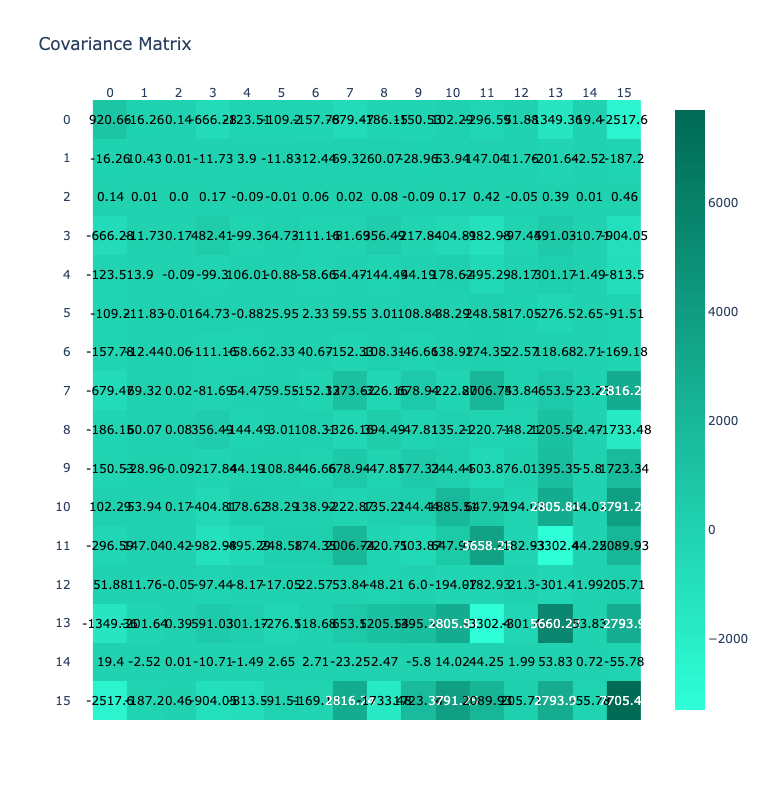

In [51]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [52]:
np.random.seed(0)
US_15 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_15.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_15.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(US_15))]
US_15 = US_15.round(2)
US_15

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_86760/4020465725.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Input 13,Input 14,Input 15,Output 1
DMU 0001,275.46,50.34,340.07,198.33,252.31,152.33,171.94,351.93,99.92,276.03,521.97,377.73,182.73,323.82,149.79,604.61
DMU 0002,215.47,60.38,340.06,310.86,293.92,194.99,213.47,449.00,236.11,219.68,448.57,389.20,136.40,381.47,155.19,549.84
DMU 0003,300.23,64.11,340.12,309.33,318.17,150.53,158.62,260.07,220.55,198.77,347.80,180.49,143.57,314.84,152.35,374.89
DMU 0004,318.80,70.69,340.03,308.70,284.31,177.03,184.56,248.79,196.65,194.76,308.82,370.43,154.72,236.00,150.82,308.83
DMU 0005,308.48,76.50,340.03,300.18,320.88,186.92,207.32,311.17,217.06,213.73,369.79,371.99,140.98,334.56,153.16,478.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,229.84,62.77,340.10,307.80,251.16,170.90,181.09,345.93,209.08,206.03,420.21,324.91,145.44,267.75,152.00,434.69
DMU 0997,277.75,63.85,340.07,297.61,292.52,163.04,211.13,295.84,217.56,231.60,454.72,233.57,140.77,400.10,155.33,528.69
DMU 0998,245.12,44.22,340.05,310.36,284.72,157.20,154.61,341.60,168.51,281.86,383.23,351.73,166.37,259.97,151.17,448.42
DMU 0999,229.51,72.14,340.09,313.09,277.03,161.84,177.60,347.74,232.43,226.38,397.84,333.21,132.83,351.30,154.23,483.78


In [53]:
(US_15<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Input 6     0
Input 7     0
Input 8     0
Input 9     0
Input 10    0
Input 11    0
Input 12    0
Input 13    0
Input 14    0
Input 15    0
Output 1    0
dtype: int64

In [54]:
US_15.to_excel("Data/US15I1O.xlsx")

In [55]:
df = pd.read_excel("Data/US15I1O.xlsx", index_col = 0)
df

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Input 13,Input 14,Input 15,Output 1
DMU 0001,275.46,50.34,340.07,198.33,252.31,152.33,171.94,351.93,99.92,276.03,521.97,377.73,182.73,323.82,149.79,604.61
DMU 0002,215.47,60.38,340.06,310.86,293.92,194.99,213.47,449.00,236.11,219.68,448.57,389.20,136.40,381.47,155.19,549.84
DMU 0003,300.23,64.11,340.12,309.33,318.17,150.53,158.62,260.07,220.55,198.77,347.80,180.49,143.57,314.84,152.35,374.89
DMU 0004,318.80,70.69,340.03,308.70,284.31,177.03,184.56,248.79,196.65,194.76,308.82,370.43,154.72,236.00,150.82,308.83
DMU 0005,308.48,76.50,340.03,300.18,320.88,186.92,207.32,311.17,217.06,213.73,369.79,371.99,140.98,334.56,153.16,478.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,229.84,62.77,340.10,307.80,251.16,170.90,181.09,345.93,209.08,206.03,420.21,324.91,145.44,267.75,152.00,434.69
DMU 0997,277.75,63.85,340.07,297.61,292.52,163.04,211.13,295.84,217.56,231.60,454.72,233.57,140.77,400.10,155.33,528.69
DMU 0998,245.12,44.22,340.05,310.36,284.72,157.20,154.61,341.60,168.51,281.86,383.23,351.73,166.37,259.97,151.17,448.42
DMU 0999,229.51,72.14,340.09,313.09,277.03,161.84,177.60,347.74,232.43,226.38,397.84,333.21,132.83,351.30,154.23,483.78
